# FIT5196 Assessment 4
#### Student Name: Zhong Ying
#### Student ID: 27726185

Date: 28/05/2017

Version: 2.0

Environment: Python 3.5.2 and Anaconda 4.1.1 (64-bit)

Libraries used:
* matplotlib.pyplot (for graph, included in Anaconda Python 3.5)
* re (for regular expression, included in Anaconda Python 3.5) 
* pandas (for dataframe, included in Anaconda Python 3.5)
* numpy (for treating null value, included in Anaconda Python 3.5)
* math (for maths operation, included in Anaconda Python 3.5)
* datetime (for convert object to date type, included in Anaconda Python 3.5)
* sklean (for perfrom normalization, included in Anaconda Python 3.5)



## 1. Introduction
This assignment aims at integrating data collected from different sources in the formats of csv and xml. We are going to resolve various schema conflicts to generate a global format to store a unified dataset. In addition, normalizationa and transformation wil be applied to price variable after merging two datasets. The effect of transformation and normalization on data will be discussed in the assignment.

1. Examine and resolve schema conflicts data schema conflicts.
2. Integrate two datasets in a global schema.
3. Apply normalization and transformation to price. Analyze their effects on distribution.

More details for each task will be given in the following sections.

## 2. Import libraries

In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import datetime
%matplotlib inline
from sklearn import preprocessing
plt.style.use( 'ggplot' )

## 3. Loading data

First, let's load the csv file and name it df_s1 

In [133]:
# load csv file
df_s1 = pd.read_table("./data_s1_ass4.csv", sep=",")

Let's check the variables' types and observe the data characteristics from the first few rows. We found that there are 18 attributes and 4600 records in csv file. The attribute price is stored in the format of object because it uses k and m to refer to one thousand or one million.

In [134]:
df_s1.dtypes

date              object
price             object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [135]:
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null object
bedrooms         4600 non-null int64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     224 non-null float64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(3), int64(9), object(6)
memory usage: 647.0+ KB


In [136]:
df_s1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,20140502T000000,313k,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,20140502T000000,2.384m,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,20140502T000000,342k,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,20140502T000000,420k,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,20140502T000000,550k,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA


Next, we parse data from the xml file and display them in dataframe with the help of ElementTree in the following way: we write a function 'parseXMLtoDF' to extract the tags as the columns of dataframe and store the elements belonging to a certain tag to be the value of corresponding column. 

In [137]:
# load xml file
import xml.etree.ElementTree as et
from lxml import etree
import pandas as pd
def parseXMLtoDF(path):
    xml = et.parse(path)
    root = xml.getroot()
    records = [] # contains all records
    headers = []
    for i, child in enumerate(root): # loop through each child node inside the parent
                                    # i: sequence index
        record = []
        for sub_child in child: # loop through child node of a child node
            record.append(sub_child.text) 
            if sub_child.tag not in headers: # check if no header exists, 
                headers.append(sub_child.tag) #put the tagname as header 
        #print(record) #check if the record is parsed
        records.append(record) # append the new record to the list
    return pd.DataFrame(records, columns=headers) # create dataframe from the list of records

The function allows us to handle the data from xml in the format of dataframe. We load the data to a dataframe called df_s2.

In [138]:
df_s2 = parseXMLtoDF("./data_s2_ass4.xml")

In [139]:
pd.set_option('display.max_colwidth', 200) # to extend column width to display all words in the form
df_s2.head()

,date,address,price,soldDate,bedrooms,bathrooms,livingArea,lotArea,floors,waterfront,view,upperArea,basementArea,buildYear,renovateYear
0,2014-07-19,"10515, 115th Place Northeast, Juanita, Kirkland, King County, Washington, 98033, United States of America",630000,2014-07-09,3,1.75,158.8641984,814.48095168,1.0,None,None,158.8641984,None,1986,0
1,2014-07-10,"1501, Northwest 90th Street, Ballard, Seattle, King County, Washington, 98117, United States of America",599950,2014-07-09,3,3.25,170.0125632,167.59708416,3.0,None,None,170.0125632,None,2014,0
2,2014-07-16,"537, North 70th Street, Phinney Ridge, Seattle, King County, Washington, 98103, United States of America",680000,2014-07-09,3,2.0,165.3674112,531.4053888,1.0,None,None,91.0449792,74.322432,1925,0
3,2014-07-13,"12008, 35th Avenue Northeast, Cedar Park, Lake City, Seattle, King County, Washington, 98125, United States of America",335500,2014-07-09,3,1.0,127.2771648,629.8826112,2.0,None,None,127.2771648,None,1930,0
4,2014-07-18,"11807, Northeast 105th Court, Juanita, Kirkland, King County, Washington, 98033, United States of America",379000,2014-07-09,3,2.5,142.1416512,270.62655552,2.0,None,None,142.1416512,None,1986,0


In [140]:
df_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 15 columns):
date            430 non-null object
address         430 non-null object
price           430 non-null object
soldDate        430 non-null object
bedrooms        430 non-null object
bathrooms       430 non-null object
livingArea      430 non-null object
lotArea         430 non-null object
floors          430 non-null object
waterfront      3 non-null object
view            34 non-null object
upperArea       430 non-null object
basementArea    181 non-null object
buildYear       430 non-null object
renovateYear    430 non-null object
dtypes: object(15)
memory usage: 50.5+ KB


In [141]:
df_s2.dtypes

date            object
address         object
price           object
soldDate        object
bedrooms        object
bathrooms       object
livingArea      object
lotArea         object
floors          object
waterfront      object
view            object
upperArea       object
basementArea    object
buildYear       object
renovateYear    object
dtype: object

In [142]:
df_s2 = df_s2.convert_objects(convert_numeric = True)
df_s2.dtypes

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


date             object
address          object
price             int64
soldDate         object
bedrooms          int64
bathrooms       float64
livingArea      float64
lotArea         float64
floors          float64
waterfront       object
view            float64
upperArea       float64
basementArea    float64
buildYear         int64
renovateYear      int64
dtype: object

By observing the data type and summary of df_s2 and further comparing them to df_s1, we find that there are several schema conflicts between these two datasets, which are as following:
##### structure conflicts

* address: the address is broke to 4 sub variables in df_s1 and use abbreviations to refer to directions and locations.
* price: price is displayed by digits in df_s2 while in df_s1 it uses 'k' and 'm' to indicate thousand and million
* area measurement: variables regarding area are measured by square foot in df_s1 but by square meter in df_s2
* waterfront: the value of waterfront is 0 and 1 in df_s1, but in df_s2, 'yes' stands for 1 and None stands for 0
* view and year_renovated: the nan value for view in df_s2 is recorded as 0 in df_s1, while year_renovated is the opposite case, it is recorded as nan in df_s1 but 0 in df_s2
    
##### naming conflicts
* date: there are two candidates in df_s2 corresponding to date in df_s1: soldDate and date.  
* area variable: variables regarding area are in the format of "sqft_place", while in df_s, they are recorded as "placeArea"
* year variable: yr_built in df_s1 is equivalent to buildYear in df_s2, yr_renovated is equivalent to renovatedYear in df_s2.

#### Solve address conflicts

To make the address variable in df_s2 compatible to that in df_s1, we need to extract country, statezip, city and street from address in df_s2 and store them under corresponding columns. First let's check the country of all records in df_s2.

It's easy to notice that country is last string in address variable, so we can split the address by comma and extract the last element. In the following code, we check the distinct value of country to see if all the houses' address are in the country of USA.

In [143]:
# extract country from 430 records in df_s2
country = df_s2['address'].apply( lambda x: [a.strip() for a in x.split(',')][-1] )

In [144]:
# check the distinct value of country in df_s2
country.value_counts()

United States of America    430
Name: address, dtype: int64

It turns out that all the properties are from USA, so we add a column to the df_s2, and assign the value of 'USA' to each tuple.

In [145]:
df_s2['country'] = 'USA' # assign 'USA' to country in each row 

Similarly, we check the state of each record in df_s2 too see if they are all from Washington State. From observation we notice that state is the third last stringof address, so we extract it out from each tuple and check their distinct values. 

In [146]:
# extract state from df_s2
state = df_s2['address'].apply( lambda x: [a.strip() for a in x.split(',')][-3])

It turns out that only one record showing that the third last string in address is not Washington but King County, however King County is not a valid state name and it belongs to Washington Sate, so we can still conclude that the state of each property is Washington.

In [147]:
# check distinct value of state
state.value_counts()

Washington     429
King County      1
Name: address, dtype: int64

Let's check why that record doesn't show the state name to be Washington. In the next code, we found that the reason for the 89 dispalying King County to be state is that it lost its zip code between state and country name. Don't worry about the problem for now, we will fix it later.

In [148]:
# identify invalid state
df_s2.ix[state[state != 'Washington'].index]

,date,address,price,soldDate,bedrooms,bathrooms,livingArea,lotArea,floors,waterfront,view,upperArea,basementArea,buildYear,renovateYear,country
89,2014-07-11,"290th Avenue Southeast, Hobart, King County, Washington, United States of America",314000,2014-07-11,3,1.75,168.154502,3883.347072,1.0,None,NaN,112.412678,55.741824,1980,0,USA


Zip code lies in the second last position in address, we can extract it using the same way as state and country. To make sure that all zip codes we extract are valid, we can use a regex 98[\d]{3} to match them, those who failed to match regex are invalid zip codes and need to be taken care of.

In [149]:
# extract zip code 
zip = df_s2['address'].apply( lambda x: [a.strip() for a in x.split(',')][-2])
# check records with invalid zip code
df_s2.ix[zip[ -zip.str.match(r"98[\d]{3}")].index]

,date,address,price,soldDate,bedrooms,bathrooms,livingArea,lotArea,floors,waterfront,view,upperArea,basementArea,buildYear,renovateYear,country
89,2014-07-11,"290th Avenue Southeast, Hobart, King County, Washington, United States of America",314000,2014-07-11,3,1.75,168.154502,3883.347072,1.0,None,NaN,112.412678,55.741824,1980,0,USA
299,2014-07-15,"521, 234th Place Northeast, Sammamish, King County, Washington, 90874, United States of America",625000,2014-07-15,4,2.50,238.760813,512.824781,2.0,None,NaN,238.760813,NaN,2000,0,USA


The above outcome shows that invalid zip code of 89 was introduced by losing its zip code, which also lead to the invalid state name as mentioned earlier, we can solve both entry mistakes by filling in its zip code. Through searching this location online, we found that its zip code is 98038. As for record 299, the invalid zip code is caused by mistakenly writing the zip code 98074 to be 90874, we can manually fix it by replacing the write code to the original one.

In [150]:
# replace the wrong address information by he correct ones
df_s2['address'].replace('290th Avenue Southeast, Hobart, King County, Washington, United States of America','290th Avenue Southeast, Hobart, King County, Washington, 98038, United States of America' , inplace = True)
df_s2['address'].replace('521, 234th Place Northeast, Sammamish, King County, Washington, 90874, United States of America','521, 234th Place Northeast, Sammamish, King County, Washington, 98074, United States of America', inplace = True)

To generate the statezip for each record, we only need to attach their zip code to the state name 'WA' since we have proven earlier that all the properties are located in Washington.

In [151]:
# assign zip code along with state name to the new column statezip
df_s2['statezip'] = "WA " + zip

Now, let's check again to see if there is invalid zip code, in other words whether all zip codes are numbers with 5 digits and start with 98. As the result shows below, record 77, 134 and 296 have invalid zipcode, further more, their address also mistakenly contain zip code, which need to be fixed by substituting valid entries. We check the address of 77, 134 and 296 online, it turns out the correct zipcode for them is 98008 and 98011.

In [152]:
# check invalid zip code
zip = df_s2['address'].apply( lambda x: [a.strip() for a in x.split(',')][-2])
df_s2.ix[zip[ -zip.str.match(r"98[\d]{3}")].index | zip[[ len(a) != 5 for a in zip ]].index]

,date,address,price,soldDate,bedrooms,bathrooms,livingArea,lotArea,floors,waterfront,view,upperArea,basementArea,buildYear,renovateYear,country,statezip
77,2014-07-20,"98027; 98006, 158th Place Southeast, Eastgate, Bellevue, King County, Washington, 98027; 98006, United States of America",710000,2014-07-10,4,2.5,266.631725,835.662845,1.0,None,NaN,173.728685,92.903040,1968,0,USA,WA 98027; 98006
134,2014-07-12,"98027; 98006, 158th Place Southeast, Eastgate, Bellevue, King County, Washington, 98027; 98006, United States of America",582000,2014-07-11,5,2.5,258.270451,1145.958998,1.0,None,NaN,147.715834,110.554618,1968,0,USA,WA 98027; 98006
296,2014-07-23,"24 Hour Fitness - Bothell, 126th Avenue Northeast, Canyon Park, Bothell, King County, Washington, 98011-9478, United States of America",447000,2014-07-14,3,2.5,161.651290,282.703951,2.0,None,NaN,161.651290,NaN,2012,0,USA,WA 98011-9478


In [153]:
# replace the wrong zip code in 77, 134 and 296
df_s2['statezip'].replace('WA 98027; 98006','WA 98008' , inplace = True)
df_s2['statezip'].replace('WA 98011-9478','WA 98011', inplace = True)
# remove the zip code from the first string in 77 and 134 
df_s2['address'].replace('98027; 98006, 158th Place Southeast, Eastgate, Bellevue, King County, Washington, 98027; 98006, United States of America', '158th Place Southeast, Eastgate, Bellevue, King County, Washington, 98027; 98006, United States of America' , inplace = True)

Now we come to extracting the street from address, based on the observation of street pattern, we found that street can be the first two elements seperated by comma in address or the first element depending on whether the first string is digit number or not. So we perform the next operation: we check the first string in address, if it is digit number, then we extract the first two elements to be street, else we only extract the first string to be address. 

In [154]:
# extract street from address
import re
df_s2['street'] = ''
for index, row in df_s2.iterrows(): #iterate over rows
    addr = row['address'].split(',')
    if re.match(r"[0-9]+", addr[0]) : # check if the first string is digit number
        df_s2.ix[index,'street'] = addr[0].strip() + ' ' + addr[1].strip()
    else: df_s2.ix[index,'street'] = addr[0]

Let's check if all street names are valid, they should be at least 2 characters in the value of street.

In [155]:
# identify record with invalid street name
df_s2[df_s2['street'].apply(len) < 2]

,date,address,price,soldDate,bedrooms,bathrooms,livingArea,lotArea,floors,waterfront,view,upperArea,basementArea,buildYear,renovateYear,country,statezip,street
104,2014-07-21,"I, South 234th Street, Des Moines, King County, Washington, 98198, United States of America",258000,2014-07-11,3,2.0,156.077107,1856.016933,1.0,None,NaN,81.754675,74.322432,1948,0,USA,WA 98198,I


The above output shows that there is one invalid entry in street, we should replace it with the valid street value.

In [156]:
df_s2['street'].replace('I','South 234th Street', inplace = True)

It is not hard to find that city is the fifth last element in address, so we apply the same method of zip code to extract city name of each house. It is possible that some city name may not be valid because of missing values of the forth last element, so to be safe, let's print out the least common city names and check whethere they are normal city names.

In [157]:
# extract city from address
city = df_s2['address'].apply( lambda x: [a.strip() for a in x.split(',')][-5])
city.value_counts()[city.value_counts() < 5]

Maple Valley                 4
Lakeland South               4
Duvall                       4
Mercer Island                4
Novelty                      4
White Center                 4
Fairwood                     4
Newcastle                    3
Snoqualmie                   3
Enumclaw                     3
Tanner                       3
Cottage Lake                 3
Des Moines                   3
Bothell                      2
SeaTac                       2
Hobart                       2
Lake Forest Park             2
Oskams Corner                2
Woodinville                  2
Pacific                      2
Mirrormont                   2
Union Hill-Novelty Hill      2
Lake Morton-Berrydale        2
Normandy Park                2
East Hill-Meridian           2
Snoqualmie Falls             1
Fall City                    1
Bryn Mawr-Skyway             1
Georgetown                   1
Cedar Grove                  1
Lea Hill                     1
Preston                      1
Krain   

It turns out that their city names are valid, so we can assign them to be the value of city with safety.

In [158]:
# generate a new column city and assign values to it
df_s2['city'] = city

Since address conflicts are solved, we can drop the address variable, but we want to keep the table with all original values, so we can create a new dataframe for s2 with address dropped, we call it df_s2new.

In [159]:
df_s2new = df_s2.drop(['address'], axis = 1 )

In [160]:
df_s2new

,date,price,soldDate,bedrooms,bathrooms,livingArea,lotArea,floors,waterfront,view,upperArea,basementArea,buildYear,renovateYear,country,statezip,street,city
0,2014-07-19,630000,2014-07-09,3,1.75,158.864198,814.480952,1.0,None,NaN,158.864198,NaN,1986,0,USA,WA 98033,10515 115th Place Northeast,Kirkland
1,2014-07-10,599950,2014-07-09,3,3.25,170.012563,167.597084,3.0,None,NaN,170.012563,NaN,2014,0,USA,WA 98117,1501 Northwest 90th Street,Seattle
2,2014-07-16,680000,2014-07-09,3,2.00,165.367411,531.405389,1.0,None,NaN,91.044979,74.322432,1925,0,USA,WA 98103,537 North 70th Street,Seattle
3,2014-07-13,335500,2014-07-09,3,1.00,127.277165,629.882611,2.0,None,NaN,127.277165,NaN,1930,0,USA,WA 98125,12008 35th Avenue Northeast,Seattle
4,2014-07-18,379000,2014-07-09,3,2.50,142.141651,270.626556,2.0,None,NaN,142.141651,NaN,1986,0,USA,WA 98033,11807 Northeast 105th Court,Kirkland
5,2014-07-14,321500,2014-07-09,1,1.00,67.819219,180.417704,1.0,None,NaN,67.819219,NaN,2008,0,USA,WA 98144,924 26th Avenue South,Seattle
6,2014-07-09,599000,2014-07-09,7,2.50,239.689843,534.192480,1.0,None,NaN,174.657715,65.032128,1901,0,USA,WA 98122,125 30th Avenue,Seattle
7,2014-07-13,759000,2014-07-09,4,1.75,195.096384,441.289440,1.0,None,NaN,124.490074,70.606310,1975,0,USA,WA 98103,5626 Keystone Place North,Seattle
8,2014-07-18,300000,2014-07-09,4,1.75,169.083533,465.908746,1.0,None,NaN,110.554618,58.528915,1926,0,USA,WA 98108,1714 South Pearl Street,Seattle
9,2014-07-16,359000,2014-07-09,3,1.50,143.999712,462.657139,1.0,None,NaN,100.335283,43.664429,1978,0,USA,WA 98133,10304 Interlake Avenue North,Seattle


#### solve price conflicts
The price in df_s1 was an object type because thousand and million are denoted by character 'k' and 'm' respectively, which will cause trouble when we do calcultions on price. Besides, it rise schema conflicts between two datasets so we need to convert the price value in df_s1 to digital numbers according to its ending (k or m). The way we are going to deal with it is to write a function to convert a single price value to digital number, then use apply this function to every row in df_s1.

In [161]:
def convertPrice( string ):
    if 'k' in string: # if price contains k, k will be removed, the string will convert to float and mulply by 1000
        string = int(float( re.sub( '[k]', '', string ) ) * 1000)
    elif 'm' in string: # if price contains m, m will be removed, the string will convert to float and mulply by 1000000
        string = int(float( re.sub( '[m]', '', string ) ) * 1000000)
    return string 

In [162]:
df_s1['price'] = df_s1['price'].apply( convertPrice )  # convert price in each row

#### solve area conflicts
We can tell at a glance that area variables in df_s1 are quite larger than those on df_s2new table, to be more specific it's nearly 10 times larger in quantity, which means they are measured in different units in csv and xml file. In df_s1 table, living area, lot area, above area and basement area are measured by square foot while in df_s2new, they are measured by square meter which can be told from the tag of "meter" in xml file. So we are going to transform area variables in df_s2new to square foot by mutiply them by 10.764 times. 

In [163]:
# generate sqft_living variable by multipling livingArea 10.764 times
df_s2new['sqft_living'] = df_s2new['livingArea'].apply( lambda x: int(round(x * 10.764)))

In [164]:
# generate sqft_lot variable by multipling lotArea 10.764 times
df_s2new['sqft_lot'] = df_s2new['lotArea'].apply( lambda x: int(round(x * 10.764)))
# generate sqft_above variable by multipling upperArea 10.764 times
df_s2new['sqft_above'] = df_s2new['upperArea'].apply( lambda x: int(round(x * 10.764)))

In [165]:
# repace na of basement area by 0 
df_s2new['basementArea'].fillna(0, inplace = True)
# generate sqft_basement variable by multipling basemetArea 10.764 times
df_s2new['sqft_basement'] = df_s2new['basementArea'].apply( lambda x: int(round(x * 10.764)))

In [166]:
# delete the original area variable
df_s2new.drop(['livingArea','lotArea','upperArea','basementArea'], axis = 1, inplace = True)
df_s2new

,date,price,soldDate,bedrooms,bathrooms,floors,waterfront,view,buildYear,renovateYear,country,statezip,street,city,sqft_living,sqft_lot,sqft_above,sqft_basement
0,2014-07-19,630000,2014-07-09,3,1.75,1.0,None,NaN,1986,0,USA,WA 98033,10515 115th Place Northeast,Kirkland,1710,8767,1710,0
1,2014-07-10,599950,2014-07-09,3,3.25,3.0,None,NaN,2014,0,USA,WA 98117,1501 Northwest 90th Street,Seattle,1830,1804,1830,0
2,2014-07-16,680000,2014-07-09,3,2.00,1.0,None,NaN,1925,0,USA,WA 98103,537 North 70th Street,Seattle,1780,5720,980,800
3,2014-07-13,335500,2014-07-09,3,1.00,2.0,None,NaN,1930,0,USA,WA 98125,12008 35th Avenue Northeast,Seattle,1370,6780,1370,0
4,2014-07-18,379000,2014-07-09,3,2.50,2.0,None,NaN,1986,0,USA,WA 98033,11807 Northeast 105th Court,Kirkland,1530,2913,1530,0
5,2014-07-14,321500,2014-07-09,1,1.00,1.0,None,NaN,2008,0,USA,WA 98144,924 26th Avenue South,Seattle,730,1942,730,0
6,2014-07-09,599000,2014-07-09,7,2.50,1.0,None,NaN,1901,0,USA,WA 98122,125 30th Avenue,Seattle,2580,5750,1880,700
7,2014-07-13,759000,2014-07-09,4,1.75,1.0,None,NaN,1975,0,USA,WA 98103,5626 Keystone Place North,Seattle,2100,4750,1340,760
8,2014-07-18,300000,2014-07-09,4,1.75,1.0,None,NaN,1926,0,USA,WA 98108,1714 South Pearl Street,Seattle,1820,5015,1190,630
9,2014-07-16,359000,2014-07-09,3,1.50,1.0,None,NaN,1978,0,USA,WA 98133,10304 Interlake Avenue North,Seattle,1550,4980,1080,470


#### solve conflicts of Null in waterfront, view and yr_renovated
If we compare the numbers of waterfront,view and yr_renovated in two tables, we will find that there are no missing values of waterfront and view in df_s1 but quite plenty in df_s2new because nan values regarding warerfront and view are denoted as 0 in df_s1. While yr_renovated is the opposite case, in df_s1 there are many missing values but the null values in df_s2new are denoted by 0. In order to achieve schema consistency of these two variables, we need to fill null of waterfront by 0 and change 0 of yr_renovated to None in df_s2new. Another thing worth noting is that the not null value in waterfront is 'yes', which also need to be changed to 1.

In [167]:
df_s2new['waterfront'].value_counts() # check distinct value of waterfront

Yes    3
Name: waterfront, dtype: int64

In [168]:
df_s2new['view'].value_counts() # check distinct value of view

2.0    18
3.0     8
1.0     5
4.0     3
Name: view, dtype: int64

In [169]:
df_s2new['renovateYear'].value_counts() # check distinct values of view

0       404
2014      3
1987      2
2004      2
2002      2
2011      2
2007      2
1991      2
2009      1
1965      1
1978      1
1983      1
1986      1
1994      1
1993      1
1997      1
2000      1
2006      1
1996      1
Name: renovateYear, dtype: int64

In [170]:
# set the value of yes to 1, and none value to 0
df_s2new['waterfront'] = df_s2new['waterfront'].apply(lambda x: 0 if x != 'yes' else 1)

In [171]:
df_s2new['view'].fillna(0, inplace = True) # replace na by 0

In [172]:
df_s2new

,date,price,soldDate,bedrooms,bathrooms,floors,waterfront,view,buildYear,renovateYear,country,statezip,street,city,sqft_living,sqft_lot,sqft_above,sqft_basement
0,2014-07-19,630000,2014-07-09,3,1.75,1.0,0,0.0,1986,0,USA,WA 98033,10515 115th Place Northeast,Kirkland,1710,8767,1710,0
1,2014-07-10,599950,2014-07-09,3,3.25,3.0,0,0.0,2014,0,USA,WA 98117,1501 Northwest 90th Street,Seattle,1830,1804,1830,0
2,2014-07-16,680000,2014-07-09,3,2.00,1.0,0,0.0,1925,0,USA,WA 98103,537 North 70th Street,Seattle,1780,5720,980,800
3,2014-07-13,335500,2014-07-09,3,1.00,2.0,0,0.0,1930,0,USA,WA 98125,12008 35th Avenue Northeast,Seattle,1370,6780,1370,0
4,2014-07-18,379000,2014-07-09,3,2.50,2.0,0,0.0,1986,0,USA,WA 98033,11807 Northeast 105th Court,Kirkland,1530,2913,1530,0
5,2014-07-14,321500,2014-07-09,1,1.00,1.0,0,0.0,2008,0,USA,WA 98144,924 26th Avenue South,Seattle,730,1942,730,0
6,2014-07-09,599000,2014-07-09,7,2.50,1.0,0,0.0,1901,0,USA,WA 98122,125 30th Avenue,Seattle,2580,5750,1880,700
7,2014-07-13,759000,2014-07-09,4,1.75,1.0,0,0.0,1975,0,USA,WA 98103,5626 Keystone Place North,Seattle,2100,4750,1340,760
8,2014-07-18,300000,2014-07-09,4,1.75,1.0,0,0.0,1926,0,USA,WA 98108,1714 South Pearl Street,Seattle,1820,5015,1190,630
9,2014-07-16,359000,2014-07-09,3,1.50,1.0,0,0.0,1978,0,USA,WA 98133,10304 Interlake Avenue North,Seattle,1550,4980,1080,470


In [173]:
# replace 0 by none in df_s2new
df_s2new['renovateYear'] = df_s2new['renovateYear'].apply(lambda x: None if x == 0 else x)

#### solve street conflict
In df_s1 direcions and places are denoted by abbreviations, to make df_s2new consistent with that, we need to use common abbreviations to replace directions and locations.

In [174]:
# make a dictionary for replacement
# exclude north, south, west, east from the dictionary in case that they will reolace directions like southeast, northwest
rep = {
       r'Northeast':'NE',
       r'Northwest':'NW',
       r'Southeast':'SE',
       r'Southwest':'SW',
       r'Avenue': 'Ave',
       r'Street': 'St',
       r'Place' : 'Pl',
       r'Court' : 'Ct',
       r'Road'  : 'Rd',
       r'Drive' : 'Dr'
      }

In [175]:
# use the above dictionary to replace directions and locations by abbreviations
df_s2new['street'].replace(rep,regex = True, inplace = True)

After replacing the composite direction names such northwest, we no longer face the problem of worrying that single diretion names such north will mistakenly replace composite direction. So we can change the single directions to abbreviations now.

In [176]:
rep2 = {
       r'North':'N',
       r'East':'E',
       r'South':'S',
       r'West':'W'
      }

In [177]:
df_s2new['street'].replace(rep2,regex = True, inplace = True) # replace single direction by their abbreviations

####  solve name conflict
There are same attributes with different names in two tables, such as yr_built in df_s1 is the buildYear in df_s2new, we need to rename them in either table to make them consistent. But there are two date variables in df_s2new, so which date variable corresponds to date in df_s1? let's just leave both of them as they are and treat them later when we can draw more information from df_s1.

In [178]:
rename = {'buildYear': 'yr_built', 'renovateYear':'yr_renovated'}# variables to be renamed
df_s2new.rename(columns= rename, inplace=True) # rename variables in df_s2new

Because df_s1 has one more condition column compared to df_s2new but lack the column of soldDate, we need to add each missing column to each table for future merging concern.

In [179]:
df_s2new['condition'] = np.nan # add the condition column to df_s2new
df_s1['soldDate'] = None # add the soldDate to df_s1 because we have not decide which date in df_s2new correspond to date in df_s1

In [180]:
# sort the column in df_s2new based on the sequence of df_s1
cols = ['soldDate', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country']
df_s2new = df_s2new[cols]
df_s2new

,soldDate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-07-09,2014-07-19,630000,3,1.75,1710,8767,1.0,0,0.0,NaN,1710,0,1986,NaN,10515 115th Pl NE,Kirkland,WA 98033,USA
1,2014-07-09,2014-07-10,599950,3,3.25,1830,1804,3.0,0,0.0,NaN,1830,0,2014,NaN,1501 NW 90th St,Seattle,WA 98117,USA
2,2014-07-09,2014-07-16,680000,3,2.00,1780,5720,1.0,0,0.0,NaN,980,800,1925,NaN,537 N 70th St,Seattle,WA 98103,USA
3,2014-07-09,2014-07-13,335500,3,1.00,1370,6780,2.0,0,0.0,NaN,1370,0,1930,NaN,12008 35th Ave NE,Seattle,WA 98125,USA
4,2014-07-09,2014-07-18,379000,3,2.50,1530,2913,2.0,0,0.0,NaN,1530,0,1986,NaN,11807 NE 105th Ct,Kirkland,WA 98033,USA
5,2014-07-09,2014-07-14,321500,1,1.00,730,1942,1.0,0,0.0,NaN,730,0,2008,NaN,924 26th Ave S,Seattle,WA 98144,USA
6,2014-07-09,2014-07-09,599000,7,2.50,2580,5750,1.0,0,0.0,NaN,1880,700,1901,NaN,125 30th Ave,Seattle,WA 98122,USA
7,2014-07-09,2014-07-13,759000,4,1.75,2100,4750,1.0,0,0.0,NaN,1340,760,1975,NaN,5626 Keystone Pl N,Seattle,WA 98103,USA
8,2014-07-09,2014-07-18,300000,4,1.75,1820,5015,1.0,0,0.0,NaN,1190,630,1926,NaN,1714 S Pearl St,Seattle,WA 98108,USA
9,2014-07-09,2014-07-16,359000,3,1.50,1550,4980,1.0,0,0.0,NaN,1080,470,1978,NaN,10304 Interlake Ave N,Seattle,WA 98133,USA


To prepare for merging two tables, we need to convert their data types to be the same, we find that variables of date and soldDate are stored in different formats and not in the type of date, so we need to convert them to the same format in the type of date.

In [181]:
# change the type of date and soldDate in df_s1
df_s1['date'] = df_s1['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%dT%H%M%S').strftime('%Y%m%dT%H%M%S'))
df_s1['soldDate']  = pd.to_datetime(df_s1['soldDate'], errors = 'coerce')

In [182]:
# change the type and format of date and soldDate in df_s2new
df_s2new['date'] = df_s2new['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y%m%dT%H%M%S'))
df_s2new['soldDate'] = df_s2new['soldDate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y%m%dT%H%M%S'))

Since all the schema conflicts are solved, each table has same column name and same data format, we are ready to concate two dataframes into one global schema.

In [183]:
# stack two tables to make a unified table
df_global = pd.concat([df_s1, df_s2new], ignore_index=True)
df_global.dtypes

bathrooms        float64
bedrooms           int64
city              object
condition        float64
country           object
date              object
floors           float64
price              int64
soldDate          object
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_lot           int64
statezip          object
street            object
view             float64
waterfront         int64
yr_built           int64
yr_renovated     float64
dtype: object

In [184]:
# arrange columns by the order specified in assignment  
cols = ['soldDate', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country']
df_global = df_global[cols]

#### Data conflict

Now that we have merged two tables into one global schema, we can check if there are duplicate rows, also we can use those duplicates to help us determine which date variable from df_s2new(i.e. date, soldDate) is the correspondent of date from df_s1. First, we need to exclude those variables only appearing in one table out and find duplicates among shared variables.

In [185]:
# generate a table where variables are common in both tables 
df_part = df_global.drop( ['condition', 'date', 'soldDate' ],axis = 1)

In [186]:
# find the duplicates
df_part[df_part.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4600,630000,3,1.75,1710,8767,1.0,0,0.0,1710,0,1986,NaN,10515 115th Pl NE,Kirkland,WA 98033,USA
4601,599950,3,3.25,1830,1804,3.0,0,0.0,1830,0,2014,NaN,1501 NW 90th St,Seattle,WA 98117,USA
4602,680000,3,2.00,1780,5720,1.0,0,0.0,980,800,1925,NaN,537 N 70th St,Seattle,WA 98103,USA
4603,335500,3,1.00,1370,6780,2.0,0,0.0,1370,0,1930,NaN,12008 35th Ave NE,Seattle,WA 98125,USA
4604,379000,3,2.50,1530,2913,2.0,0,0.0,1530,0,1986,NaN,11807 NE 105th Ct,Kirkland,WA 98033,USA
4605,321500,1,1.00,730,1942,1.0,0,0.0,730,0,2008,NaN,924 26th Ave S,Seattle,WA 98144,USA
4606,599000,7,2.50,2580,5750,1.0,0,0.0,1880,700,1901,NaN,125 30th Ave,Seattle,WA 98122,USA
4607,759000,4,1.75,2100,4750,1.0,0,0.0,1340,760,1975,NaN,5626 Keystone Pl N,Seattle,WA 98103,USA
4608,300000,4,1.75,1820,5015,1.0,0,0.0,1190,630,1926,NaN,1714 S Pearl St,Seattle,WA 98108,USA
4609,359000,3,1.50,1550,4980,1.0,0,0.0,1080,470,1978,NaN,10304 Interlake Ave N,Seattle,WA 98133,USA


when we identify duplicates in the merged table, we find that the value of date from df_s1 equals to that of soldDate rather than date of df_s2new, in other words, soldDate is the actual correspondent of date in df_s1. As a result, we need to replace the value of date by soldDate for the records whose index is larger than 4599. We also find the first 30 records in df_s2new are redundant so we need to remove them from df_s2new to avoid data duplicates.

In [187]:
# identify the duplicates in the merged table, rows with indexes larger tha 4599 are from df_s2new 
df_global[df_part.duplicated(keep=False)].sort('street')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,soldDate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4620,20140709T000000,20140718T000000,440000,3,1.50,1270,1413,3.0,0,0.0,NaN,1270,0,2007,NaN,1018 NE 96th St,Seattle,WA 98115,USA
4568,NaN,20140709T000000,440000,3,1.50,1270,1413,3.0,0,0.0,3.0,1270,0,2007,NaN,1018 NE 96th St,Seattle,WA 98115,USA
4609,20140709T000000,20140716T000000,359000,3,1.50,1550,4980,1.0,0,0.0,NaN,1080,470,1978,NaN,10304 Interlake Ave N,Seattle,WA 98133,USA
4533,NaN,20140709T000000,359000,3,1.50,1550,4980,1.0,0,0.0,3.0,1080,470,1978,NaN,10304 Interlake Ave N,Seattle,WA 98133,USA
4600,20140709T000000,20140719T000000,630000,3,1.75,1710,8767,1.0,0,0.0,NaN,1710,0,1986,NaN,10515 115th Pl NE,Kirkland,WA 98033,USA
4505,NaN,20140709T000000,630000,3,1.75,1710,8767,1.0,0,0.0,4.0,1710,0,1986,NaN,10515 115th Pl NE,Kirkland,WA 98033,USA
4604,20140709T000000,20140718T000000,379000,3,2.50,1530,2913,2.0,0,0.0,NaN,1530,0,1986,NaN,11807 NE 105th Ct,Kirkland,WA 98033,USA
4521,NaN,20140709T000000,379000,3,2.50,1530,2913,2.0,0,0.0,4.0,1530,0,1986,NaN,11807 NE 105th Ct,Kirkland,WA 98033,USA
4603,20140709T000000,20140713T000000,335500,3,1.00,1370,6780,2.0,0,0.0,NaN,1370,0,1930,NaN,12008 35th Ave NE,Seattle,WA 98125,USA
4517,NaN,20140709T000000,335500,3,1.00,1370,6780,2.0,0,0.0,3.0,1370,0,1930,NaN,12008 35th Ave NE,Seattle,WA 98125,USA


In [188]:
# replace date by soldDate for records from df_s2new
df_global.ix[4600:,'date'] = df_global.ix[4600:,'soldDate']

In [189]:
# remove soldDate from merged table
df_global.drop(['soldDate'], axis = 1, inplace = True)

In [190]:
# drop duplicates
df_global.drop( df_global.index[4600:4630], axis = 0, inplace = True)

In [192]:
df_global =df_global.reset_index(drop = True)

#### mapping of local schema to global schema
Now we have solved the schema issues and data conflicts and generate a unified table with columns from csv and xml file, let's reiterate the mapping from local schema to global schema:
* date: map from the date of csv file and soldDate of xml file
* price: map from price from both files, but use the type from xml file, price from csv file is converted from object to numeric to fit in the global schema
* bedrooms: map from both tables
* bathrooms: map from both tables
* sqft_living: map from sqft_living in csv file and livingArea in xml file whose measurement changed from square meter to square foot
* sqft_lot: map from sqft_lot in csv file and lotArea in xml file whose measurement changed from square meter to square foot
* sqft_above: map from sqft_above in csv file and upperArea in xml file whose measurement changed from square meter to square foot
* sqft_basement: map from sqft_basement in csv file and basementArea in xml file whose measurement changed from square meter to square foot
* floors: map from both files
* waterfront: map from both files, but the value of which from xml file has changed from yes and none to 0 and 1
* view: map from both files, but the none value of which from xml file has changed 0
* condition: map from both files
* yr_built: map from yr_built from cvs file and buildYear from xml file
* yr_renovated: map from yr_renovated in csv file and renovateYear in xml file, the 0 value in csv file has changed to nan in global schema
* street: map from street in csv file and first two strings (in most case) in address in xml file
* city: map from city in csv file and fifth last in address in xml file
* statezip: map from statezip in csv file and state name and zipcode in address in xml file
* country: map from country in csv file and last string in address in xml file

## Z-Score Normalisation (standardisation): 

In [193]:
%matplotlib inline

We use scikit-learn linrary for standardise data (mean=0, SD=1). We standardise the values of price and append the standard variables price_Z to the df_global as follows:

In [194]:
std_scale = preprocessing.StandardScaler().fit(df_global['price'])
df_std = std_scale.transform(df_global['price']) # an array not a df
df_global['price_Z'] = df_std

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape yo

In order to investigate how the z normalization actually affect the data, we can visualize the data by plotting the variable values. Firstly, we plot the original data and data after normalizaton side by side where x axis being their indexes and y axis being their values.
After observing the range and the centre of the distribution for the standardised features, we found that although the center and range are shifted, its shape is still same, which implies that the distribution of data is not changed after z normalization.

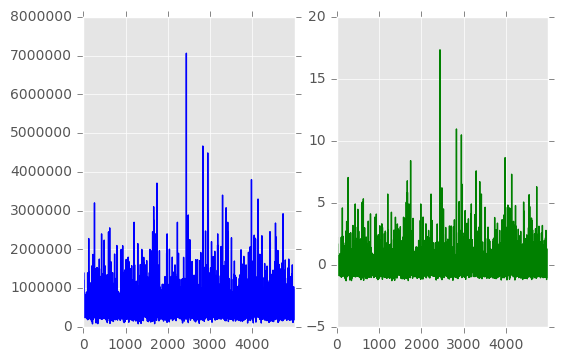

In [195]:
plt.subplot(1, 2, 1)
df_global['price'].plot( color = 'blue')
plt.subplot(1, 2, 2)
df_global['price_Z'].plot( color = 'green')

To further compare the distribution of data before and after z normalization, we plot the histogram of price and price_Z side by side. Histogram is an effective tool for deciding whether the distribution has changed after normalization because it allow us to see the kurtosis and skewness of distribution, which is vital to identify a distrbition.

As the histograms below shows that the distribution of original data and z score are identical in shape, so it is fair to say that z normalization only change the center and range of data but not the distribution of data.

(array([  4.16600000e+03,   6.94000000e+02,   9.80000000e+01,
          2.90000000e+01,   8.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -1.27841903,   0.58387311,   2.44616525,   4.30845738,
          6.17074952,   8.03304166,   9.89533379,  11.75762593,
         13.61991807,  15.4822102 ,  17.34450234]),
 <a list of 10 Patch objects>)

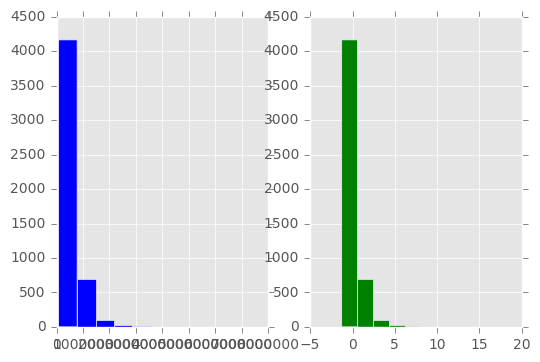

In [196]:
plt.subplot(1, 2, 1)
plt.hist(df_global['price'],  color = 'blue')
plt.subplot(1, 2, 2)
plt.hist(df_global['price_Z'],  color = 'green')

## MinMax Noramlisation:

Similarly, we implement minmax normalisation with the help of scikit-learn and append the standard variables price_MM to the df_global as follows:

In [197]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_global['price'])
df_minmax = minmax_scale.transform(df_global['price'])
df_global['price_MM'] = df_minmax

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


First, let's check the plot of data values before and after MinMax normalisation, as the graph below shows that the shape remains same although center and range are apparantly shifted.

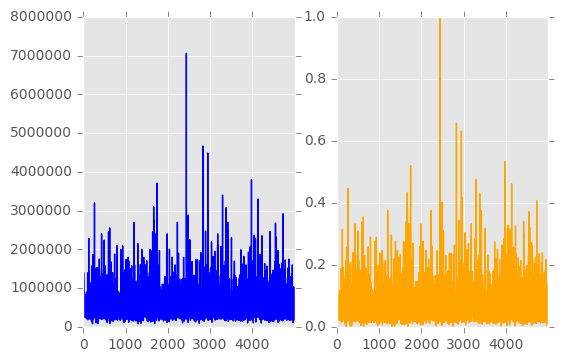

In [198]:
plt.subplot(1, 2, 1)
df_global['price'].plot( color = 'blue')
plt.subplot(1, 2, 2)
df_global['price_MM'].plot( color = 'orange')

Next let's compare the histograms to further determine the change of distribution by observing the skewness and kurtosis of data. As the plots turns out the shape of distribution remains the same, so we can draw the same conclusion as z normalization, that is MinMax only change the center and range of data but not the distribution of data. 

(array([  4.16600000e+03,   6.94000000e+02,   9.80000000e+01,
          2.90000000e+01,   8.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

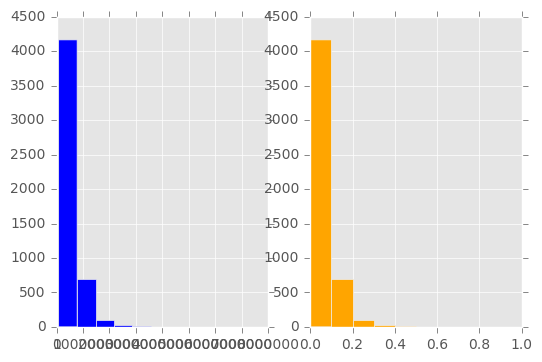

In [199]:
plt.subplot(1, 2, 1)
plt.hist(df_global['price'],  color = 'blue')
plt.subplot(1, 2, 2)
plt.hist(df_global['price_MM'],  color = 'orange')

## Log Transformation:

Lastly, we will perform the log transformation to price, the code below is based on tutorial 11.

In [200]:
import math
df_global['price_Log'] = None
i = 0
for row in df_global.iterrows(): #loop over each row
    df_global['price_Log'].at[i] = math.log(df_global['price'][i])
    i += 1

From the plot of individual values below we can see that the shape of value has changed obviously to a different state, which indicates that the ditribution has been changed after log transformation. 

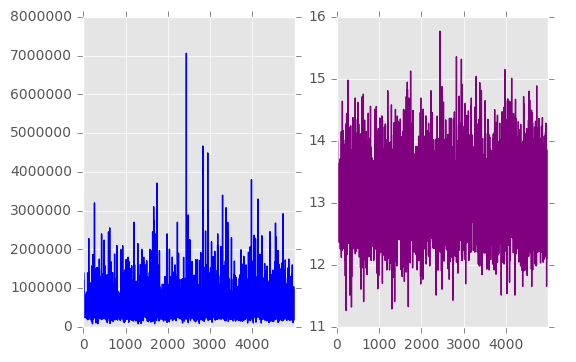

In [201]:
plt.subplot(1, 2, 1)
df_global['price'].plot( color = 'blue')
plt.subplot(1, 2, 2)
df_global['price_Log'].plot( color = 'purple')

Let's further explore the effect of log transformation on distribution of data by comparing histograms of both variables, we can easily tell from graph that after log transformation, the distribution become more like normal distribution and less skewed because the tail on the right of price has go down the ladder, which means the effect of extremely large values has been relieved by log transformation.

(array([   21.,   126.,   843.,  1521.,  1536.,   682.,   201.,    57.,
           11.,     2.]),
 array([ 11.26446411,  11.71504866,  12.16563322,  12.61621777,
         13.06680233,  13.51738688,  13.96797143,  14.41855599,
         14.86914054,  15.3197251 ,  15.77030965]),
 <a list of 10 Patch objects>)

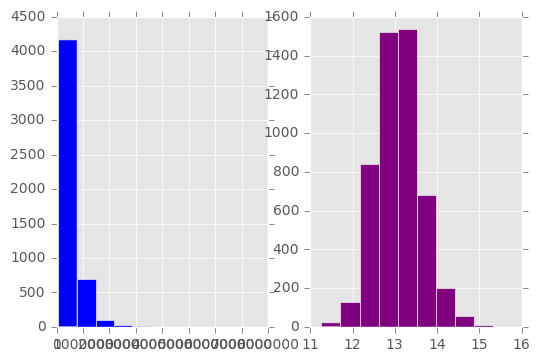

In [202]:
plt.subplot(1, 2, 1)
plt.hist(df_global['price'],  color = 'blue')
plt.subplot(1, 2, 2)
plt.hist(df_global['price_Log'],  color = 'purple')

We can explore the reason why normalization won't change distribution shape but log transformation change it by drawing the scatter plot between price and the tranformed or normalized values. As we see below, the plots in the first row are those of z normalization and min-max normalization, the plot in the second row displays that of log transformation. It is easy to notice that normalization is the linear transformation of data, so it won't alter the shape of distribution while log transformation is the non linear transformation, thus it will change the relative distance between data, in other words, large values are squeezed to a smaller range so their distribution won't remain same as before.

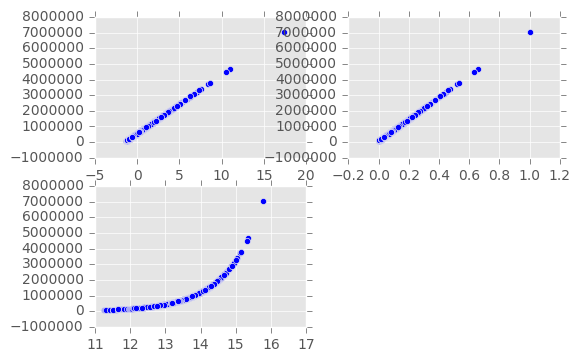

In [203]:
plt.subplot(2, 2, 1)
plt.scatter(df_global.price_Z, df_global.price)  # draw the relationship between price and price_Z, x axis is price_Z, y axis is price
plt.subplot(2, 2, 2)
plt.scatter(df_global.price_MM, df_global.price)  # draw the relationship between price and price_MM, x axis is price_MM, y axis is price
plt.subplot(2, 2, 3)
plt.scatter(df_global.price_Log, df_global.price)  # draw the relationship between price and price_Log, x axis is price_Log, y axis is price

In [204]:
df_global.shape

(5000, 21)

In [205]:
df_global.to_csv('Zhong_27726185_ass4_data.csv')